In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# New Section

# New Section

In [14]:
#from google.colab import drive
#drive.mount('/content/drive')

In [15]:
BATCH_SIZE = 16
IMAGE_SIZE = 224
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/admin/OneDrive/CSE ECE 2023/ECE-EEE/Karthick/2023/TRI/ear biometrices/EAR BIOMETRICES/Dataset1/train",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/admin/OneDrive/CSE ECE 2023/ECE-EEE/Karthick/2023/TRI/ear biometrices/EAR BIOMETRICES/Dataset1/test",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE  
)

Found 7637 files belonging to 2 classes.
Found 971 files belonging to 2 classes.


In [16]:
class_names = train_dataset.class_names
class_names


['femalefin', 'malefin']

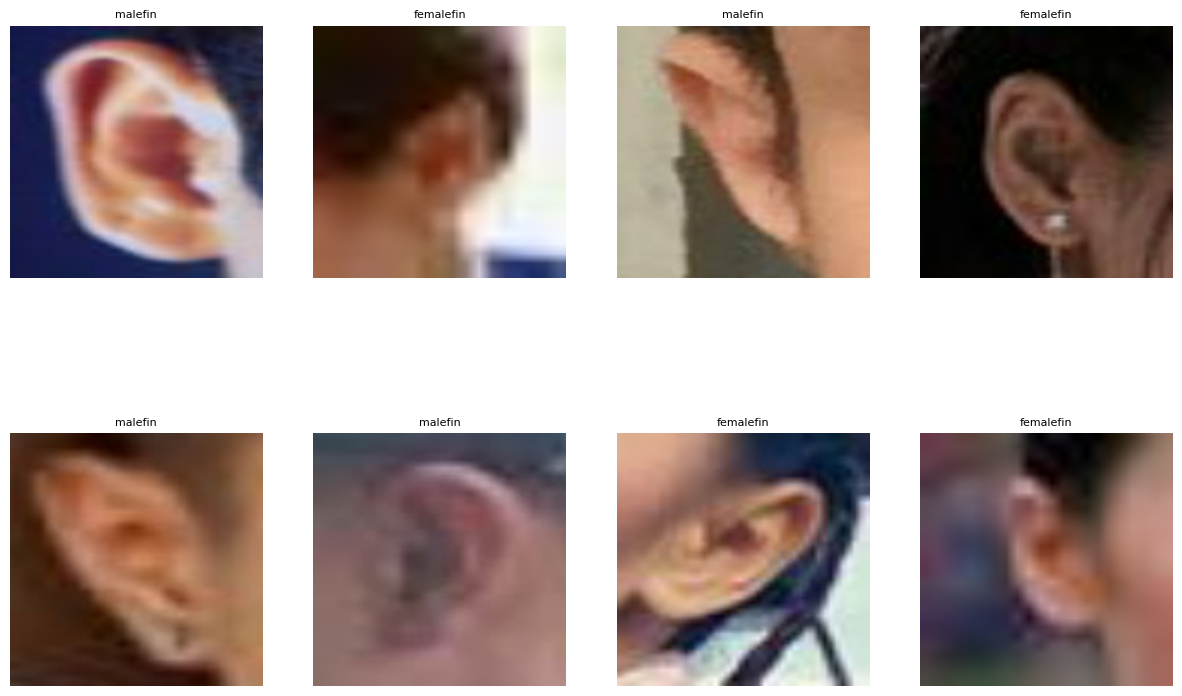

In [17]:
plt.figure(figsize = (15,15))
for image_batch, label_batch in train_dataset.take(1):
  for i in range(8):
     ax = plt.subplot(3,4,i+1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]],fontsize = 8)
     plt.axis("off")

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import time
start_time=time.perf_counter()
im_height = 224
im_width = 224
batch_size = 29
epochs = 5
classNum=2
saveModelName='genderclassification.h5'
image_path = "C:/Users/admin/OneDrive/CSE ECE 2023/ECE-EEE/Karthick/2023/TRI/ear biometrices/EAR BIOMETRICES/Dataset1/"
train_dir = image_path + "train"
if not os.path.exists("save_weights"):
    os.makedirs("save_weights")
train_image_generator = ImageDataGenerator(rescale=1. / 255,  rotation_range=40, width_shift_range=0.2,  height_shift_range=0.2,  shear_range=0.2,  zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir, batch_size=batch_size,shuffle=True,  target_size=(im_height, im_width), class_mode = 'binary')
train_datagen =ImageDataGenerator(rescale=1./255, validation_split=0.25)

validation_generator = train_datagen.flow_from_directory(
    'C:/Users/admin/OneDrive/CSE ECE 2023/ECE-EEE/Karthick/2023/TRI/ear biometrices/EAR BIOMETRICES/Dataset1/test',
    target_size=(im_height, im_width),
    batch_size=batch_size,
    class_mode = 'binary'
    ) # set as validation data


total_train = train_data_gen.n
covn_base = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(im_width, im_height, 3))
covn_base.trainable = True
model = tf.keras.Sequential()
model.add(covn_base)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=["accuracy"])
history = model.fit(x=train_data_gen,steps_per_epoch=total_train // batch_size,epochs=epochs,validation_data = validation_generator)


Found 7637 images belonging to 2 classes.
Found 971 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/5
263/263 [==============================] - 1080s 4s/step - loss: 0.3674 - accuracy: 0.8392 - val_loss: 0.8384 - val_accuracy: 0.5304
Epoch 2/5

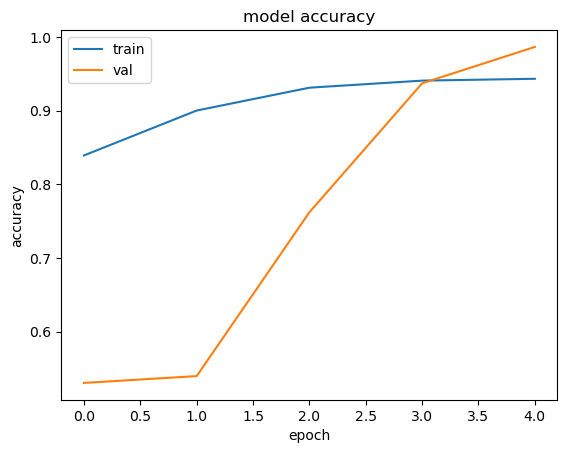

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

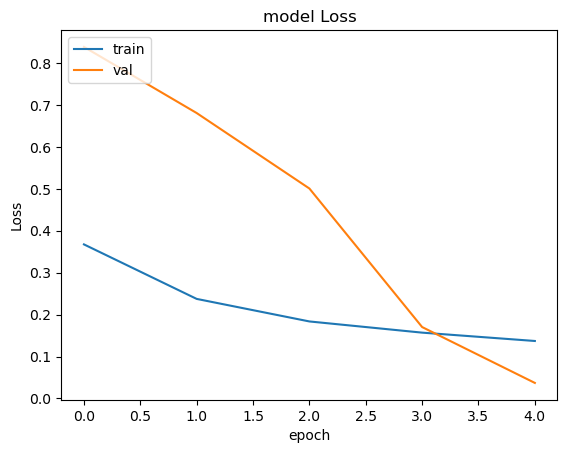

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model.save_weights("genderclassification1.h5")
print('totalRunTime',(time.perf_counter()-start_time)/60.0,'min')

totalRunTime 119.09686640166662 min
